<a href="https://colab.research.google.com/github/sairamnimmadi/git-session/blob/master/NLPHANDS_ON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import nltk
#nltk.download('punkt')
s = nltk.word_tokenize("Its raining today and its cool tooo!")
print(s)
se = nltk.sent_tokenize("Hi,how are you? can you give your laptop?")
print(se)

['Its', 'raining', 'today', 'and', 'its', 'cool', 'tooo', '!']
['Hi,how are you?', 'can you give your laptop?']


In [0]:
tknzr = nltk.TweetTokenizer()
s0 = "@remy:This is a coool #dummysmiley: :-) :-p <3 and some"
tknzr.tokenize(s0)

['@remy',
 ':',
 'This',
 'is',
 'a',
 'coool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-p',
 '<3',
 'and',
 'some']

In [0]:
tknzr1 = nltk.TweetTokenizer(strip_handles=True, reduce_len=True)
s1 = '@remy: @kohli This is waaaaaayyy @virat too much for you!!!!'
tknzr1.tokenize(s1)

[':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']

In [0]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
word_list =["friend","friendship","friends","friendships","stabil","football"]
porter = PorterStemmer()
lancaster = LancasterStemmer()
print("{0:20} {1:20} {2:20}".format("Word", "Porter Stemmer", "Lancaster Stemmer"))
print()
for i in word_list:
      print("{0:20} {1:20} {2:20}".format(i, porter.stem(i), lancaster.stem(i)))

Word                 Porter Stemmer       Lancaster Stemmer   

friend               friend               friend              
friendship           friendship           friend              
friends              friend               friend              
friendships          friendship           friend              
stabil               stabil               stabl               
football             footbal              footbal             


In [0]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#nltk.download('wordnet')
sentence ="He was running eatings at the same time. He has bad habit of arguing"
punctuations = "?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
  if word in punctuations:
    sentence_words.remove(word)
print("{0:20} {1:20}".format("Word", "verb_Lemma"))
print()
for word in sentence_words:
  print("{0:20} {1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

Word                 verb_Lemma          

He                   He                  
was                  be                  
running              run                 
eatings              eat                 
at                   at                  
the                  the                 
same                 same                
time                 time                
He                   He                  
has                  have                
bad                  bad                 
habit                habit               
of                   of                  
arguing              argue               


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('/content/drive/My Drive/Exploring Text Data/tweets.csv',encoding="ISO-8859-1")
# encoding = 'ISO-8859-1'
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [0]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('/tweets.csv',encoding="ISO-8859-1")
# encoding = 'ISO-8859-1'
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [42]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)
    #print(word_list)
    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    #print(word_freq[:20])
    
    return word_freq

gen_freq(dataset.text.str)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
of                          4053
#Demonetization             3253
demonetization              3162
on                          2751
#demonetization             2474
PM                          2384
Modi                        2379
India                       2243
and                         2220
a                           2180
that                        2168
out                         1729
for                         1672
so                          1599
had                         1598
who                         1591
Narendra                    1564
by                          1488
rich                        1477
find                        1421
Dear                        1407
implement                   1399
actually                    1370
have                        1315
@evanspiegel                1306
          

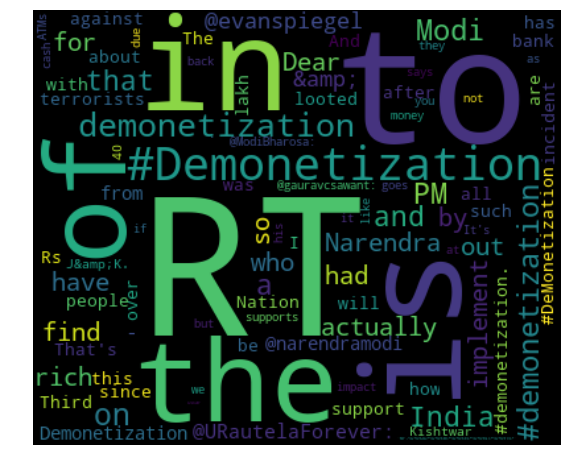

In [49]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(dataset.text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [45]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'like', "where's", 'such', 'was', 'if', "they've", 'my', "they'll", 'who', "he's", 'doing', 'those', "why's", 'be', "that's", "i'll", 'www', 'what', 'ought', 'with', 'above', 'again', "wasn't", 'since', "doesn't", 'them', 'each', 'hers', 'there', 'to', 'until', "we're", "when's", 'by', 'his', 'on', 'theirs', 'her', 'we', "i'd", "they're", "he'll", 'so', 'over', "we've", "i'm", "there's", 'while', "she's", 'are', 'against', "you're", "isn't", 'otherwise', "wouldn't", "didn't", 'more', 'she', 'under', 'between', "who's", "weren't", 'than', 'most', 'yourself', 'here', 'during', 'too', 'myself', 'been', 'however', 'http', "how's", 'below', "they'd", "shouldn't", 'is', "hadn't", "can't", "hasn't", 'he', 'which', "we'll", 'up', 'as', 'ever', 'com', 'else', "mustn't", "he'd", 'itself', 'then', 'for', 'a', 'r', 'has', 'through', 'once', 'our', 'themselves', 'very', 'whom', "here's", 'or', 'k', 'being', 'further', 'before', 'down', 'off', 'at', 'cannot', 'also', 'where', 'were', 'you', 'own', 

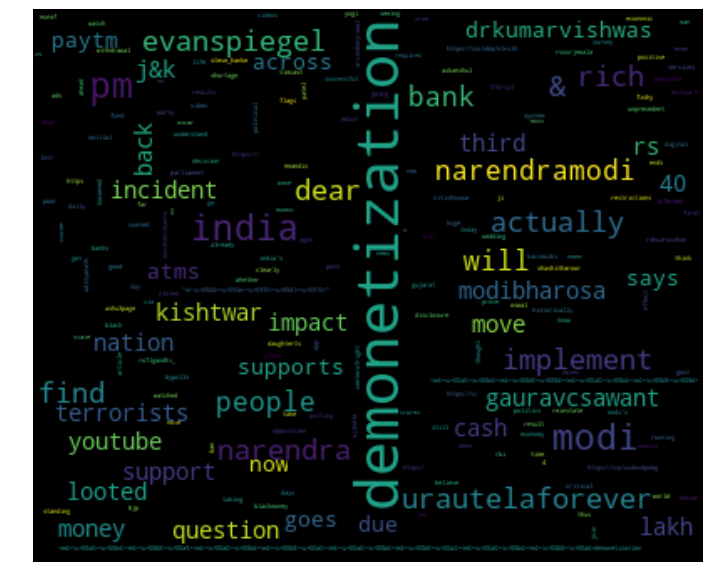

In [50]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()